In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("/kaggle/input/air-quality-data-in-india/city_day.csv")

In [9]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


# Data Cleaning

In [3]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [10]:
df = df[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']].dropna()

In [11]:
df.isna().sum()

PM2.5    0
PM10     0
NO2      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [12]:
df

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
1595,37.55,122.41,85.12,15.08,163.01,48.23,281.0
1596,33.97,116.32,79.71,14.67,91.26,51.86,330.0
1597,35.48,130.07,77.61,18.02,98.35,38.99,356.0
1598,34.11,138.31,75.23,13.27,88.66,42.22,359.0
1599,33.69,111.73,68.90,34.56,80.90,36.95,547.0
...,...,...,...,...,...,...,...
29526,15.02,50.94,25.06,0.47,8.55,23.30,41.0
29527,24.38,74.09,26.06,0.52,12.72,30.14,70.0
29528,22.91,65.73,29.53,0.48,8.42,30.96,68.0
29529,16.64,49.97,29.26,0.52,9.84,28.30,54.0


# Model Training

In [13]:
X = df[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']]
y = df['AQI']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
#Scaling is only for KNN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

## KNN

In [17]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_preds = knn.predict(X_test_scaled)

# Evaluation

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, y_true, y_pred):
    print(f"{name} Evaluation:")
    print(f"MAE:  {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²:   {r2_score(y_true, y_pred):.2f}")
    print("-" * 30)

evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("KNN", y_test, knn_preds)

Random Forest Evaluation:
MAE:  16.56
RMSE: 28.79
R²:   0.92
------------------------------
KNN Evaluation:
MAE:  17.39
RMSE: 29.03
R²:   0.92
------------------------------


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


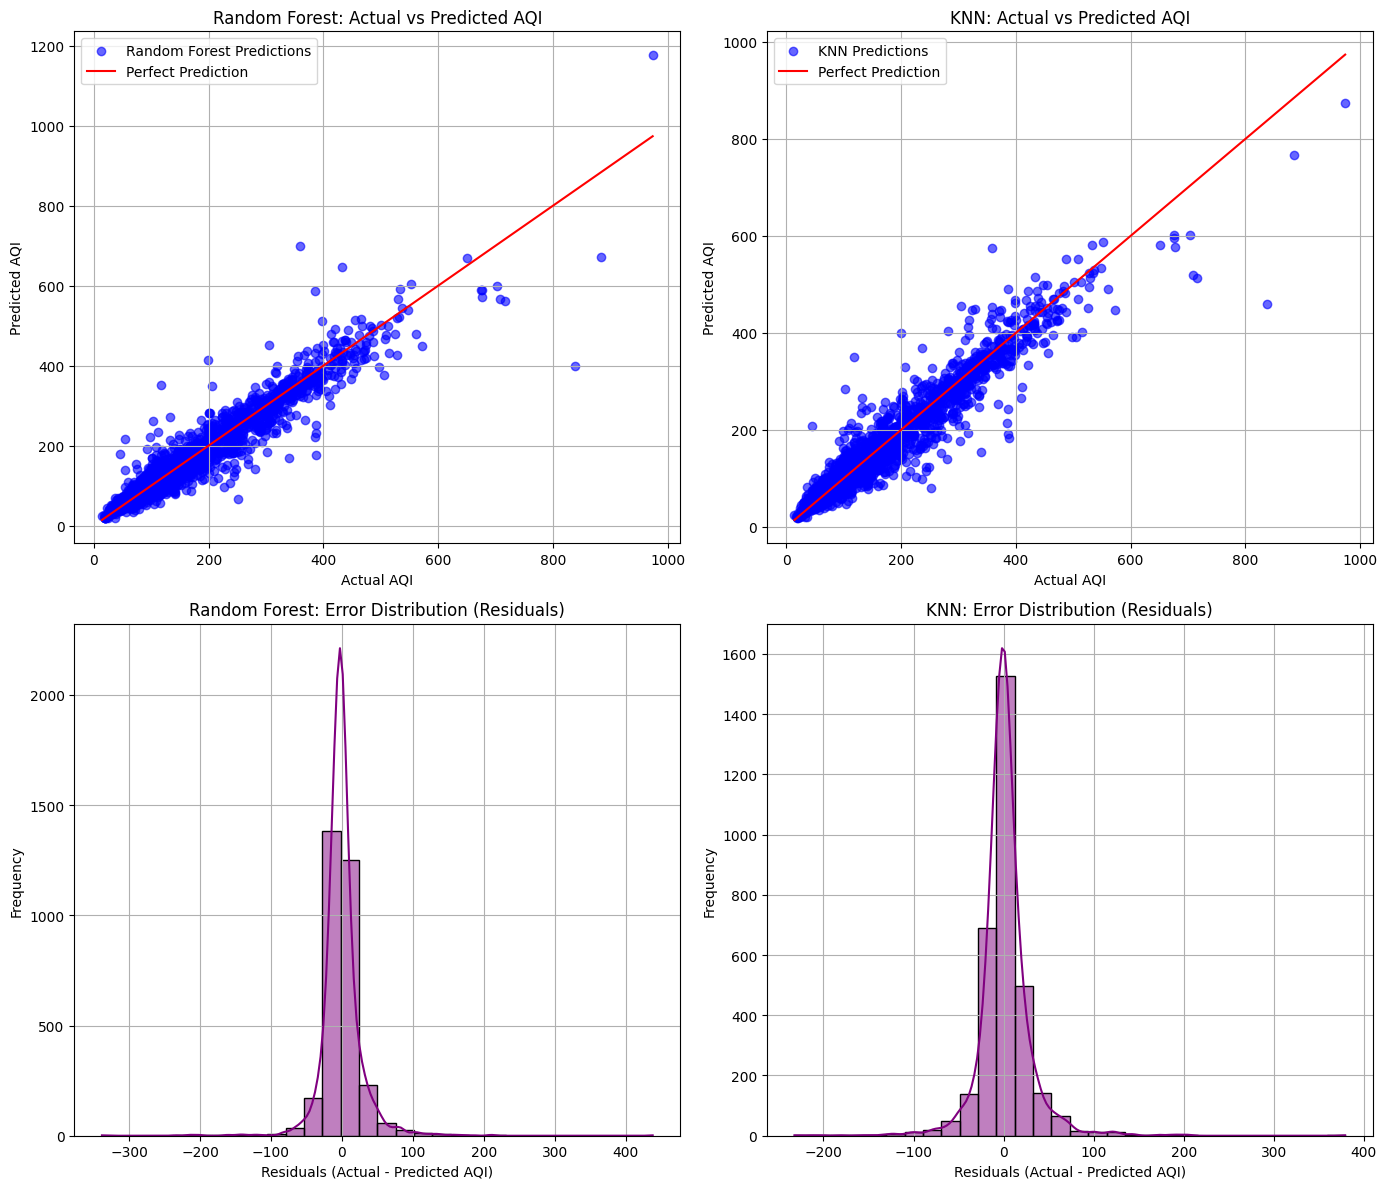

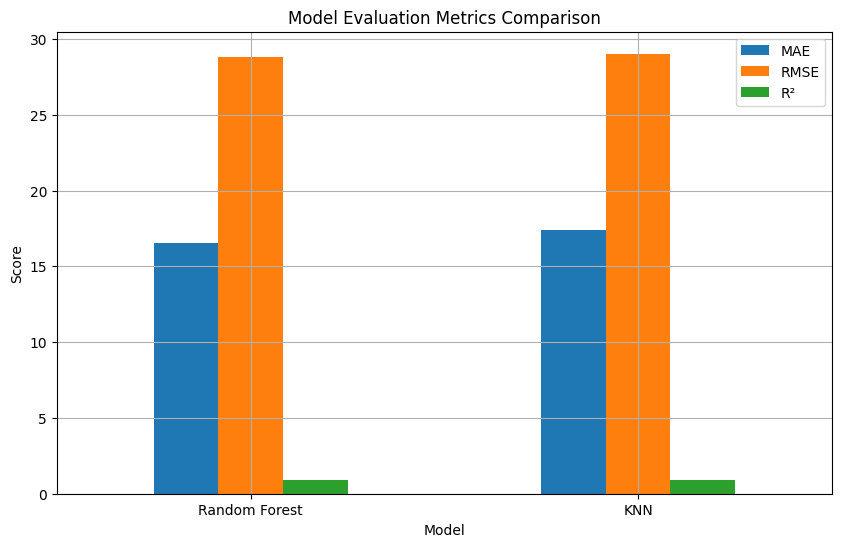

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Function to visualize predictions vs actual
def visualize_predictions(y_true, y_pred, model_name, ax):
    ax.scatter(y_true, y_pred, alpha=0.6, color='b', label=f'{model_name} Predictions')
    ax.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', label='Perfect Prediction')
    ax.set_xlabel('Actual AQI')
    ax.set_ylabel('Predicted AQI')
    ax.set_title(f'{model_name}: Actual vs Predicted AQI')
    ax.legend()
    ax.grid(True)

# Function to visualize error distribution
def visualize_errors(y_true, y_pred, model_name, ax):
    residuals = y_true - y_pred
    sns.histplot(residuals, kde=True, color='purple', bins=30, ax=ax)
    ax.set_title(f'{model_name}: Error Distribution (Residuals)')
    ax.set_xlabel('Residuals (Actual - Predicted AQI)')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Function to compare evaluation metrics
def compare_model_metrics():
    models = ['Random Forest', 'KNN']
    mae = [mean_absolute_error(y_test, rf_preds), mean_absolute_error(y_test, knn_preds)]
    rmse = [np.sqrt(mean_squared_error(y_test, rf_preds)), np.sqrt(mean_squared_error(y_test, knn_preds))]
    r2 = [r2_score(y_test, rf_preds), r2_score(y_test, knn_preds)]
    
    metrics_df = pd.DataFrame({
        'Model': models,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    })
    
    # Plotting comparison in a separate axis
    fig, ax = plt.subplots(figsize=(10, 6))
    metrics_df.set_index('Model').plot(kind='bar', ax=ax)
    ax.set_title('Model Evaluation Metrics Comparison')
    ax.set_ylabel('Score')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.grid(True)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Visualize Predictions vs Actual for both models
visualize_predictions(y_test, rf_preds, 'Random Forest', axes[0, 0])
visualize_predictions(y_test, knn_preds, 'KNN', axes[0, 1])

# Visualize Error Distribution for both models
visualize_errors(y_test, rf_preds, 'Random Forest', axes[1, 0])
visualize_errors(y_test, knn_preds, 'KNN', axes[1, 1])

# Adjust layout
plt.tight_layout()

# Display model comparison metrics
compare_model_metrics()

# Show the plot
plt.show()
